In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math

2024-04-08 11:04:55.597945: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 11:04:55.598016: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 11:04:55.599835: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 11:04:55.609304: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 11:04:56.905007: W tensorflow/compiler/tf2

# Data Preprocessing

In [2]:
df = pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-04-08 00:00:00+00:00,200.10,200.23,196.34,196.42,25881697,48.157508,48.188795,47.252599,47.271853,103526788,0.0,1.0
1,AAPL,2019-04-09 00:00:00+00:00,199.50,202.85,199.23,200.32,35768237,48.013108,48.819343,47.948128,48.210455,143072948,0.0,1.0
2,AAPL,2019-04-10 00:00:00+00:00,200.62,200.74,198.18,198.68,21695288,48.282655,48.311535,47.695427,47.815761,86781152,0.0,1.0
3,AAPL,2019-04-11 00:00:00+00:00,198.95,201.00,198.44,200.85,20900808,47.880741,48.374109,47.758001,48.338009,83603232,0.0,1.0
4,AAPL,2019-04-12 00:00:00+00:00,198.87,200.14,196.21,199.20,27760668,47.861487,48.167135,47.221313,47.940908,111042672,0.0,1.0


In [3]:
df_close = df.reset_index()['close']
df_close.head()

0    200.10
1    199.50
2    200.62
3    198.95
4    198.87
Name: close, dtype: float64

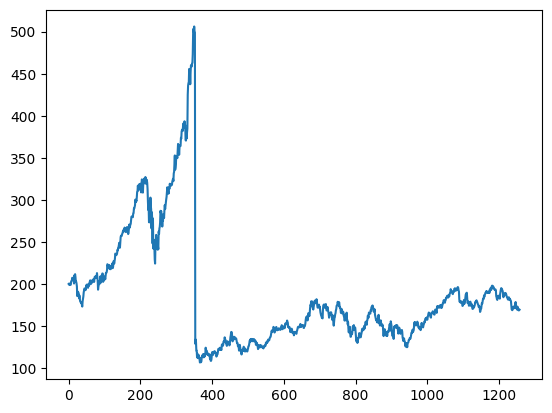

In [4]:
plt.plot(df_close)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
df_close = scaler.fit_transform(np.array(df_close).reshape(-1,1))
print(df_close)

[[0.23358798]
 [0.23208516]
 [0.23489042]
 ...
 [0.15731997]
 [0.15524108]
 [0.15714465]]


In [6]:
train_size = int(len(df_close)*0.65)
test_size = len(df_close)-train_size
train_data, test_data = df_close[0:train_size,:], df_close[train_size:len(df_close),:1]
train_data.shape, test_data.shape

((817, 1), (441, 1))

In [7]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)


In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(716, 100) (716,)
(340, 100) (340,)


# Creating Model

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

2024-04-08 11:04:59.838584: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2794 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


2024-04-08 11:05:00.224693: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Epoch 1/100


2024-04-08 11:05:07.030725: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-04-08 11:05:07.947521: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f5b100a7190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-08 11:05:07.947561: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-04-08 11:05:07.964127: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1712554508.133779    6174 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


12/12 [==============================] - 9s 134ms/step - loss: 0.0287 - val_loss: 7.8353e-04
Epoch 2/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0131 - val_loss: 0.0017
Epoch 3/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0114 - val_loss: 3.4112e-04
Epoch 4/100
12/12 [==============================] - 0s 23ms/step - loss: 0.0098 - val_loss: 9.6441e-04
Epoch 5/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0090 - val_loss: 0.0011
Epoch 6/100
12/12 [==============================] - 0s 28ms/step - loss: 0.0072 - val_loss: 2.6428e-04
Epoch 7/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0063 - val_loss: 4.3911e-04
Epoch 8/100
12/12 [==============================] - 0s 40ms/step - loss: 0.0057 - val_loss: 2.6526e-04
Epoch 9/100
12/12 [==============================] - 0s 29ms/step - loss: 0.0051 - val_loss: 8.3447e-04
Epoch 10/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0048 -

In [12]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 8ms/step


In [13]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [14]:
math.sqrt(mean_squared_error(y_train, train_predict))

208.29401335876247

In [15]:
math.sqrt(mean_squared_error(y_test, test_predict))

166.52768410022856

# Predicting the test data and plotting the output

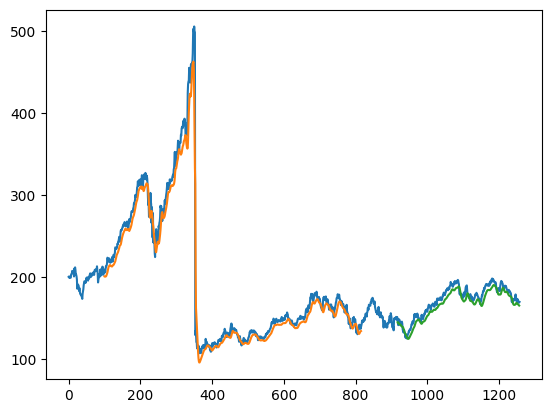

In [16]:
look_back = 100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df_close)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict

plt.plot(scaler.inverse_transform(df_close))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# Predicting for the next 30 days

In [17]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [18]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [19]:
temp_input

[0.19927363807138382,
 0.19526612398246712,
 0.20187852222917968,
 0.20330619912335623,
 0.2075641828428303,
 0.2075140889167188,
 0.21192235441452717,
 0.20989355040701307,
 0.211571696931747,
 0.20821540388227922,
 0.2077645585472761,
 0.2092924232936756,
 0.20671258609893545,
 0.20816530995616772,
 0.2113963681903569,
 0.20686286787726987,
 0.21685660613650587,
 0.21410144020037564,
 0.21898559799624295,
 0.22259236067626798,
 0.21625547902316838,
 0.22008766437069505,
 0.2282279273638071,
 0.22860363180964305,
 0.2272510958046336,
 0.22304320601127103,
 0.22567313713212267,
 0.2203882279273638,
 0.22001252348152783,
 0.21730745147150904,
 0.21592986850344392,
 0.21618033813400123,
 0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.19807138384470874,
 0.19233562930494674,
 0.18995616781465247,
 0.20485911083281144,
 

In [20]:
# x_input = test_data[341:].reshape(1,-1)
# temp_input = list(x_input)

# temp_input = temp_input[0].tolist()


In [21]:
import numpy as np

lst_output = []
n_steps = 100
i = 0

while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])  # Consider only the last n_steps elements
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape to match model's input shape
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))  # Reshape to match model's input shape
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

print(lst_output)


TypeError: in user code:

    File "/home/shounakpaul/Documents/Code/Machine Learning/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/home/shounakpaul/Documents/Code/Machine Learning/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/shounakpaul/Documents/Code/Machine Learning/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/home/shounakpaul/Documents/Code/Machine Learning/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/home/shounakpaul/Documents/Code/Machine Learning/.venv/lib64/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/shounakpaul/Documents/Code/Machine Learning/.venv/lib64/python3.9/site-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

len(df_close)

1258

NameError: name 'lst_output' is not defined

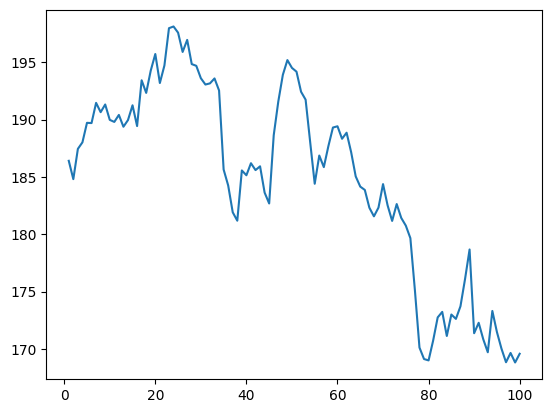

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df_close[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))